# The naive MNIST Dataset Neural Network
This a naive implementation of a Neural Network, with no architure like Keras or TensorFlow associated with it.
This implementation uses only Numpy, a bit of Scipy nad Mathplotlib.

This I guess is the most basic way anyone can Implement a Neural Network and is a great Way to start with the topic. 
You can actually see the mathametical functions being naively implemented with numpy over here.

And the entire notebook is based on the book  
**Make your own Neural Network**

If you want to know more about the technique simply read the book, I guess if you are starting with Deep Learning, This book will help you in the basic nature of working of a Neural Network.



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import scipy.special
import matplotlib.pyplot as mplot

In the next three cells have a simple description of a function in python, calling it and making of a zero value matrix using numpy, if you already know it do skip it.

In [ ]:
# function that takes 2 numbers as input
# and outputs their average
def avg(x,y):
    print("first input is", x)
    print("second input is", y)
    a = (x + y) / 2
    print("average is", a)
    return a

In [ ]:
# calling a function
avg(200,301)


In [ ]:
# intro to numpy
a = np.zeros([3,2,1])
a

# Defining the Neural network

Here I have defined the Neural Network in simply three parts
* Initialization in __init__
* Training in train
* Query to test the trained network

Basically I have done it by defining a class called neuralNetwork
and defing the above mentioned three parts as methods in it.

Interestingly the Initialisation code is pretty straightforward and self explainatory, though you may have query about the weights initialization, to assure you it is nothing but initializing the weights of the network randomly duriing the very first forward loop.

Next is the training loop where actually the main drama happens, to over simplify ,it also can be broken down into two smaller steps
* Forward Loop
* Back Propagation

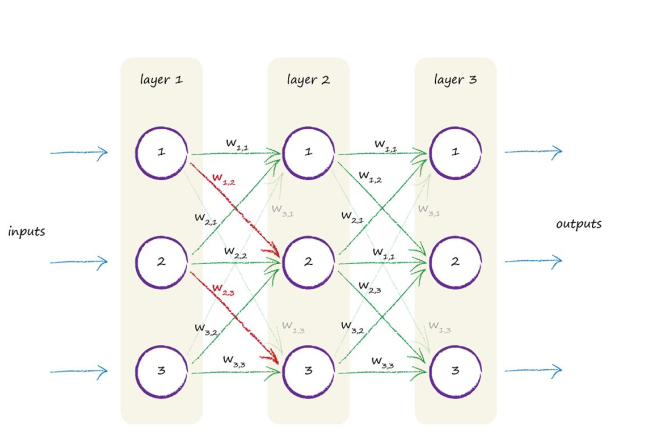

This diagram shows the all the layers in the network.

Again to over simplify Forward loop is randomly sticking to certain weights to look at the pixels in this case and then being sad at the end by having a lot error in that initial go.
And then comes in Backpropagation cleaning up the mess of errors created by the forward loop by calculating the error and then using it to modify the initially random weights, in such a way that it gets reduced.

Now logically we repeat this process not only for all the data in the dataset but also for all of the datset a multiple epochs(no. of times a datset is learned by the system).

That's it bingo! We have made a neural network, though I genuinely skipped a lot mathematics in between. ( I am just as lazy as you so do look into the book, it is really very easily and simply explained. Ohh shit I am talking about this book like as if they have paid me, alas! if only it was True.)


Okay lastly in the Query we simply use the value of weights which is learned in the training to predict the Test data.


My Job's done it seems. Now  do scroll down this long next block, don't worry this one was the biggest.



In [ ]:
# neural network class definition
class neuralNetwork:
# initialise the neural network
    def __init__(self , inputnodes, hiddennodes, outputnodes,
learningrate):
        # set number of nodes in input , hidden and output layers
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        #learning rate
        self.lr = learningrate
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        self.wih = np.random.normal(0.0, pow(self.hnodes,0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes,0.5), (self.onodes, self.hnodes))
        # activation function is the sigmoid function
        self.activation_function = lambda x:scipy.special.expit(x)
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        
        # defining the Forward Loop
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        #defining the Backpropagation parameters
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights,recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)

        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * 
                                         final_outputs * 
                                         (1.0 - final_outputs)),
                                        np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * 
                                         hidden_outputs * 
                                         (1.0 - hidden_outputs)), 
                                        np.transpose(inputs))
        pass
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden laye
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

Okay now we set the structure of the network, bassically what you do in the sequential in keras.

Also in the previous block I have used sigmoid activation function.
Now since you have already started thinking what the hell is then remember it is simply the step function without the strictness graphically speaking and for the people who have already started shouting at me it is this mathematical function.

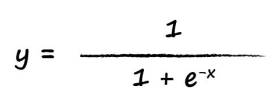

In simple terms it is just a decorated switch.

The network is nothing but a mesh of switches turned on and off with random figures called weights multiplied with the input and guided and bettered by using the error to randomly come upon the best possible predictions with the available amount of data.

Basically its all about choosing the best possible weight combination for predicting.Now since their are layers, hence

> X​ hidden​​ =​W​ input_hidden  ∙ I

> O​ hidden​​ = sigmoid( ​ X​ hidden ​) 

O hidden is the output of the hidden layer and also the input to the next layer,

> X​ output​​ =​W​ hidden_output​ ∙ O​ hidden







In [ ]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate is 0.1
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)



In [ ]:
# n.query((1.0,2.0,5.0))

Loading the training and test data, you can go ahead and try this with pandas.

In [ ]:
train_data_file = open('/kaggle/input/mnist-original/mnist_train.csv', 'r')
train_data_list = train_data_file.readlines()
train_data_file.close()

test_data_file =  open('/kaggle/input/mnist-original/mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

Now is the training of the network , actually the same as Fitting as in Keras.

In [ ]:
# go through all records in the training data set
# train the neural network
# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
# go through all records in the training data set
    for record in train_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass



Finally we test the test data with the weights ultimately agreed upon by the system.

In [ ]:
# test the neural network
# scorecard for how well the network performs, initially empty
scorecard = []
# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # print(correct_label, "correct label")
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    # print(label, "network's answer")
    # append correct or incorrect to list
    if (label == correct_label):
    # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
    # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
    pass

Now the last but not the least this block gives you the accuracy.

In [ ]:
scorecard_array = np.asarray(scorecard)
acc = scorecard_array.sum()/scorecard_array.shape
print('Accuracy = ',float(acc))

Rest of the code is a tried code which failed to execute, If you are feel free you can use it for your own uses.

In [ ]:
#     train_data_list[21][:786]

In [ ]:
# print(mplot.imshow( inputs.reshape(28,28) , cmap='Greys',interpolation='None'))
# in_inputs[2]

In [ ]:
# # test
# scorecard =[]
# for i in range(0,len(test_data)):
#     test_inputs = list(test_data.iloc[[i]])
    
#     # all_values[0] is the target label for this record
#     correct_label = int(test_inputs[0])
#     #print(correct_label, "correct label")
#     inputs = (np.asfarray(test_inputs[1:]) / 255.0 * 0.99) + 0.01
#     outputs = n.query(inputs)
#     label = np.argmax(outputs)
#     if correct_label == label:
#         scorecard.append(1)
#     else:
#     # network's answer doesn't match correct answer, add 0 to scorecard
#         scorecard.append(0)
#     pass

In [ ]:
# in_inputs = list(test_data.iloc[[4]])
# # all_values[0] is the target label for this record
# correct_label = int(in_inputs[0])
# #print(correct_label, "correct label")
# inputs = (np.asfarray(in_inputs[1:]) / 255.0 * 0.99) + 0.01
# outputs = n.query(inputs)
# label = np.argmax(outputs)
# print(correct_label,label)